In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement).filter(extract('month', Measurement.date)==6).all()


In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in results_june]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps_list, columns=['temp'])
june_temp_df

,temp
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in results_dec]
dec_temps_list[:5]


[76.0, 74.0, 74.0, 64.0, 64.0]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temps_list, columns=['temp'])
dec_temp_df

,temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Collect and Visualize Average Temperatures for June and December

In [12]:
# Query database for the average temp data of June and Dec by year
sel = [func.avg(Measurement.tobs)]
temp_data = session.query(*sel, Measurement.date).filter(func.strftime("%m", Measurement.date).in_(["06", "12"])).\
group_by(func.strftime("%m", Measurement.date)).group_by(func.strftime("%Y", Measurement.date)).order_by(Measurement.date).all() 
temp_data_df = pd.DataFrame(temp_data, columns = ['Avg Temp', 'date'])
# Convert date column data to datetime format
temp_data_df['date'] = pd.to_datetime(temp_data_df['date'])
# Create month column for data labelling
temp_data_df['Month'] = temp_data_df['date'].dt.month_name().str[:3]
temp_data_df['Year'] = temp_data_df['date'].dt.year
# Confirm datatypes of the temperature dataframe
temp_data_df.dtypes
# View new dataframe to confirm format
temp_data_df

,Avg Temp,date,Month,Year
0,74.925620,2010-06-01,Jun,2010
1,70.208511,2010-12-01,Dec,2010
2,73.938326,2011-06-01,Jun,2011
3,70.820628,2011-12-01,Dec,2011
4,74.000000,2012-06-01,Jun,2012
5,71.188073,2012-12-01,Dec,2012
6,74.599078,2013-06-01,Jun,2013
7,71.094017,2013-12-01,Dec,2013
8,75.027907,2014-06-01,Jun,2014
9,69.896861,2014-12-01,Dec,2014


Text(0.5, 1.0, 'Average Temperatures for June and Dec.')

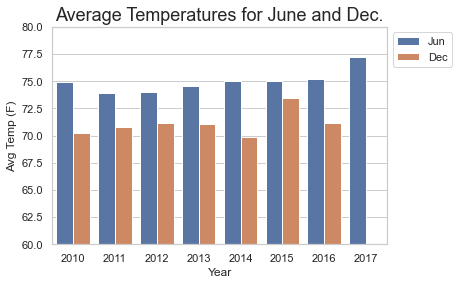

In [13]:
# Create plot of average temps in June and Dec
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Avg Temp", hue='Month', data=temp_data_df)
plt.ylim(60, 80)
plt.ylabel('Avg Temp (F)')
plt.legend(bbox_to_anchor= (1,1))
plt.title("Average Temperatures for June and Dec.", fontsize = 18)           

# Collect and Visualize Average Temperature Data by Month between 2010 and 2017

In [14]:
# Query database for avg temp data by month
sel = [func.avg(Measurement.tobs)]
temp_all = session.query(Measurement.date, *sel).group_by(func.strftime("%m", Measurement.date)).all()
temp_all = pd.DataFrame(temp_all, columns=['date', 'Avg Temp'])
temp_all['date'] = pd.to_datetime(temp_all['date'])
temp_all['Month'] = temp_all['date'].dt.month_name().str[:3]
temp_all

,date,Avg Temp,Month
0,2010-01-01,68.726115,Jan
1,2010-02-01,69.442236,Feb
2,2010-03-01,70.059067,Mar
3,2010-04-01,72.357268,Apr
4,2010-05-01,73.680900,May
5,2010-06-01,74.944118,Jun
6,2010-07-01,76.082408,Jul
7,2010-08-01,76.412454,Aug
8,2010-09-01,76.164865,Sep
9,2010-10-01,75.391388,Oct


Text(0.5, 1.0, 'Average Monthly Temperatures Between 2010 and 2017')

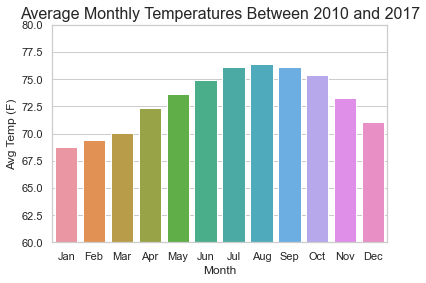

In [15]:
# Plot avg temperature values by month from the database 
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="Month", y="Avg Temp", data=temp_all)
plt.ylim(60, 80)
plt.ylabel('Avg Temp (F)')
plt.title("Average Monthly Temperatures Between 2010 and 2017", fontsize=16)

# Collect the precipitation data 

In [16]:
# Query database to retrieve the precipitation for the month of June. 
results_june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
jun_precip_list = [precip.prcp for precip in results_june_prcp]
june_prcp_df = pd.DataFrame(results_june_prcp, columns=['prcp'])
june_prcp_df

,prcp
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [17]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
june_prcp_df.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [18]:
# Query database to retrieve the precipitation for the month of December. 
results_dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_precip_list = [precip.prcp for precip in results_dec_prcp] 
dec_prcp_df = pd.DataFrame(dec_precip_list, columns=['prcp']).dropna()
dec_prcp_df

,prcp
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [19]:
dec_prcp_df.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


# Collect and Visualize Average Precipitation Data for June and December

In [20]:
# Query database to get average prcp data of June and Dec by year
sel = [func.avg(Measurement.prcp)]
precip_data = session.query(*sel, Measurement.date).filter(func.strftime("%m", Measurement.date).in_(["06", "12"])).\
group_by(func.strftime("%m", Measurement.date)).group_by(func.strftime("%Y", Measurement.date)).order_by(Measurement.date).all() 
precip_data
precip_data_df = pd.DataFrame(precip_data, columns = ['Avg Prcp', 'date'])
# Convert date column data to datetime format
precip_data_df['date'] = pd.to_datetime(precip_data_df['date']).dropna()
# Create month and year column for data labeling
precip_data_df['Month'] = precip_data_df['date'].dt.month_name().str[:3]
precip_data_df['Year'] = precip_data_df['date'].dt.year
# Confirm datatypes of the precipitation dataframe
precip_data_df.dtypes
# View new dataframe to confirm format
precip_data_df

,Avg Prcp,date,Month,Year
0,0.042241,2010-06-01,Jun,2010
1,0.459087,2010-12-01,Dec,2010
2,0.240142,2011-06-01,Jun,2011
3,0.201581,2011-12-01,Dec,2011
4,0.097062,2012-06-01,Jun,2012
5,0.089604,2012-12-01,Dec,2012
6,0.144195,2013-06-01,Jun,2013
7,0.169014,2013-12-01,Dec,2013
8,0.124372,2014-06-01,Jun,2014
9,0.188439,2014-12-01,Dec,2014


Text(0.5, 1.0, 'Average Precipitation in June and Dec.')

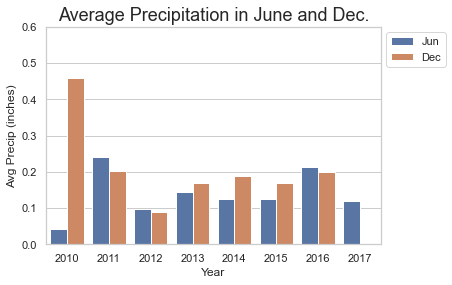

In [21]:
# Create plot of average temps in June and Dec
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Avg Prcp", hue='Month', data=precip_data_df)
plt.ylim(0, .6)
plt.ylabel('Avg Precip (inches)')
plt.legend(bbox_to_anchor= (1,1))
plt.title("Average Precipitation in June and Dec.", fontsize = 18)      

# Collect and Visualize Average Precipitation Data by Month between 2010 and 2017

In [22]:
# Query database for avg temp by month
sel = [func.avg(Measurement.prcp)]
prcp_all = session.query(Measurement.date, *sel).group_by(func.strftime("%m", Measurement.date)).all()
prcp_all = pd.DataFrame(prcp_all, columns=['date', 'Avg Prcp']).dropna()
prcp_all['date'] = pd.to_datetime(prcp_all['date'])
prcp_all['Month'] = prcp_all['date'].dt.month_name().str[:3]
prcp_all

,date,Avg Prcp,Month
0,2010-01-01,0.129975,Jan
1,2010-02-01,0.137271,Feb
2,2010-03-01,0.204227,Mar
3,2010-04-01,0.150639,Apr
4,2010-05-01,0.145677,May
5,2010-06-01,0.136360,Jun
6,2010-07-01,0.167922,Jul
7,2010-08-01,0.146662,Aug
8,2010-09-01,0.164249,Sep
9,2010-10-01,0.155606,Oct


Text(0.5, 1.0, 'Average Monthly Precipitation Between 2010 and 2017')

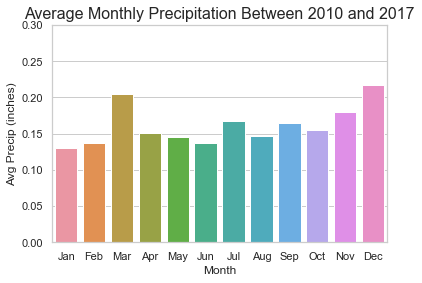

In [23]:
# Plot avg precipication values by month from the database 
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="Month", y="Avg Prcp", data=prcp_all)
plt.ylim(0, .3)
plt.ylabel('Avg Precip (inches)')
plt.title("Average Monthly Precipitation Between 2010 and 2017", fontsize=16)